In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2 as cv
import itertools
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [2]:
train_path = "C:\\Users\\sanji\\Desktop\\SIGN LANGUAGE RECOGNITION\\DATA_FOR_TRANS\\TRAIN"
test_path = "C:\\Users\\sanji\\Desktop\\SIGN LANGUAGE RECOGNITION\\DATA_FOR_TRANS\\TEST"

In [15]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = train_path,target_size = (64,64),class_mode = 'categorical',classes=['1','2','3','4','5'],batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = test_path,target_size = (64,64),class_mode = 'categorical',classes=['1','2','3','4','5'],batch_size = 10)

Found 9700 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


In [13]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32,kernel_size =(3,3),activation = 'relu',input_shape = (64,64,3),padding = 'same'),
    tf.keras.layers.MaxPool2D(strides = 2,pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding = 'same'),
    tf.keras.layers.MaxPool2D(strides = 2,pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding = 'same'),
    tf.keras.layers.MaxPool2D(strides=2,pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5,activation = 'softmax')
])

In [14]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)       

In [16]:
model1.compile(optimizer=SGD(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
learn_rate_reduct = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=1,min_lr=0.0005)
stop_train = EarlyStopping(monitor = 'val_loss',patience=2)

In [17]:
model1.fit(x=train_batches,epochs=5,steps_per_epoch=train_batches.n/10,callbacks=[learn_rate_reduct,stop_train],validation_data = test_batches,validation_steps=test_batches.n/10)

Epoch 1/5
970/970 [==============================] - 86s 88ms/step - loss: 1.5397 - accuracy: 0.3694 - val_loss: 1.2670 - val_accuracy: 0.3867 - lr: 0.0010
Epoch 2/5
970/970 [==============================] - 99s 102ms/step - loss: 1.0578 - accuracy: 0.5689 - val_loss: 0.7018 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3/5
970/970 [==============================] - 109s 112ms/step - loss: 0.8475 - accuracy: 0.6541 - val_loss: 0.1680 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/5
970/970 [==============================] - 98s 101ms/step - loss: 0.5681 - accuracy: 0.7778 - val_loss: 0.0042 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/5
970/970 [==============================] - 98s 101ms/step - loss: 0.3228 - accuracy: 0.8826 - val_loss: 2.8542e-04 - val_accuracy: 1.0000 - lr: 0.0010


In [29]:
def disp(imgs):
    fig,axes = plt.subplots(1,10,figsize=(30,20))
    axes=axes.flatten()
    for img,ax in zip(imgs,axes):
        img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [19]:
imgs,labels = next(test_batches)
loss,acc=model1.evaluate(imgs,labels)

1/1 [==============================] - 0s 201ms/step - loss: 3.0013e-04 - accuracy: 1.0000


In [20]:
model1.save("Trained_model.h5")

In [22]:
model=tf.keras.models.load_model(r"Trained_model.h5")

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)       

In [27]:
name=['one','two','three','four','five']
predictions = model.predict(imgs)

1/1 [==============================] - 0s 58ms/step


one five three four four four three three five four 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

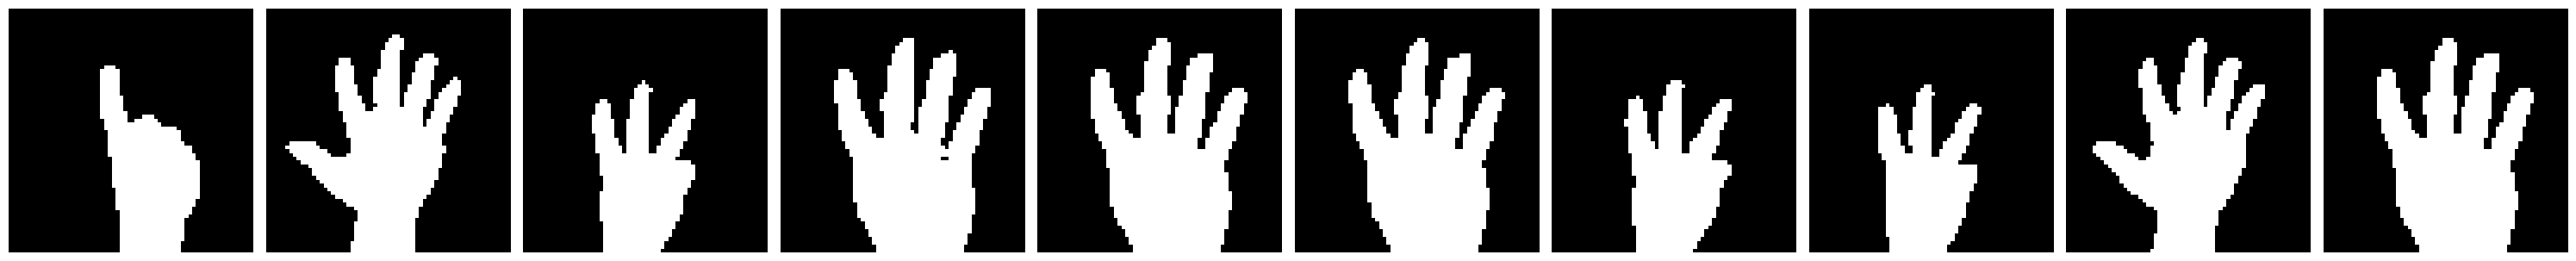

one five three four four four three three five four 

In [30]:
for k,i in enumerate(predictions):
    print(name[np.argmax(i)],end=' ')
    
disp(imgs)
for i in labels:
    print(name[np.argmax(i)],end=' ')